In [1]:
import matplotlib.pyplot as plt

In [18]:
mpeg = []
compressed1 = []
with open('stats', 'r') as f:
    for line in f.readlines():
        line = line.split(',')
        name = line[0]
        acc = float(line[1])
        bw = int(line[2])
        if 'compressed' in name:
            if 'base_34' in name and 'tile_80' in name:
                compressed1.append({
                    'acc': acc,
                    'bw': bw
                }) 
            if 'base_34' in name and 'tile_16' in name:
                compressed1.append({
                    'acc': acc,
                    'bw': bw
                }) 
        else:
            mpeg.append({
                'acc': acc,
                'bw': bw
            })

In [12]:
plt.style.use('ggplot')

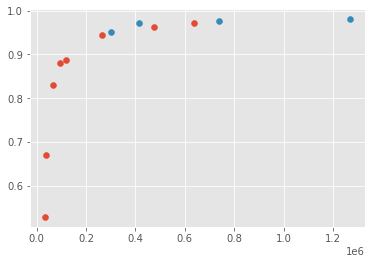

In [15]:
plt.scatter([i['bw'] for i in mpeg], [i['acc'] for i in mpeg])
plt.scatter([i['bw'] for i in compressed], [i['acc'] for i in compressed1])
plt.scatter([i['bw'] for i in compressed], [i['acc'] for i in compressed2])

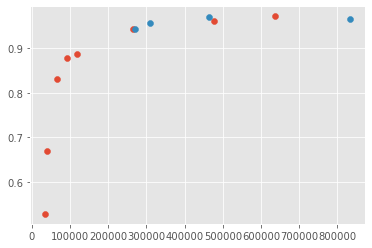

In [17]:
plt.scatter([i['bw'] for i in mpeg], [i['acc'] for i in mpeg])
plt.scatter([i['bw'] for i in compressed], [i['acc'] for i in compressed])